# User Test Notebook

### Objective of the notebook.

This notebook is a concise version of my broader project. It gives you the opportunity to build and fine-tune your own model for probability predictions, following the main guidelines and principles I established in my research to achieve a high-performing model. In addition, you can develop a small betting strategy that leverages this model, with the aim of outperforming bookmakers and their odds.

---

### Notebook Overview

1. Data preprocessing
2. Model definition
3. Model evaluation
4. Comparison of predicted probabilities and bookmakers’ probabilities
5. Trying to beat the bookmakers
---

### Conventions:
Inside the code cells, any section where you can adjust or customize the code is labeled with # TODO in blue for clarity.

---

### Quick explanation of the problem and the model I built
I treated this as a binary classification problem:
- Victory (result = 1)
- Draw or Defeat (result = 0)

For each match, I considered team A and team B separately, generating “independent” predictions for each team’s victory probability. The model ignores the correlation between the two teams’ outcomes.

In [141]:
# DEVELOPER SECTION: Skip for User Tests

#Settings relative to .ipynb file format that have to be executed here

#Make reloading of modules automatic et évite d'avoir à redémarer le kernel et tout re executer pour appliquer la modification d'un module dans __main__.
%load_ext autoreload  
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
# DEVELOPER SECTION: Skip for User Tests
#src.useful_functions
import sys
sys.path.append('../src')  # Adjust the path to import modules in src/



from data import make_dataset
from data import preprocessing
from visualization import visualize
import user_test
from pipeline import model, results
from sklearn.base import clone
import pandas as pd

 <strong> <font size="5"> I) Data preprocessing

 <strong> <font size="4"> 1) Visualization of the dataset

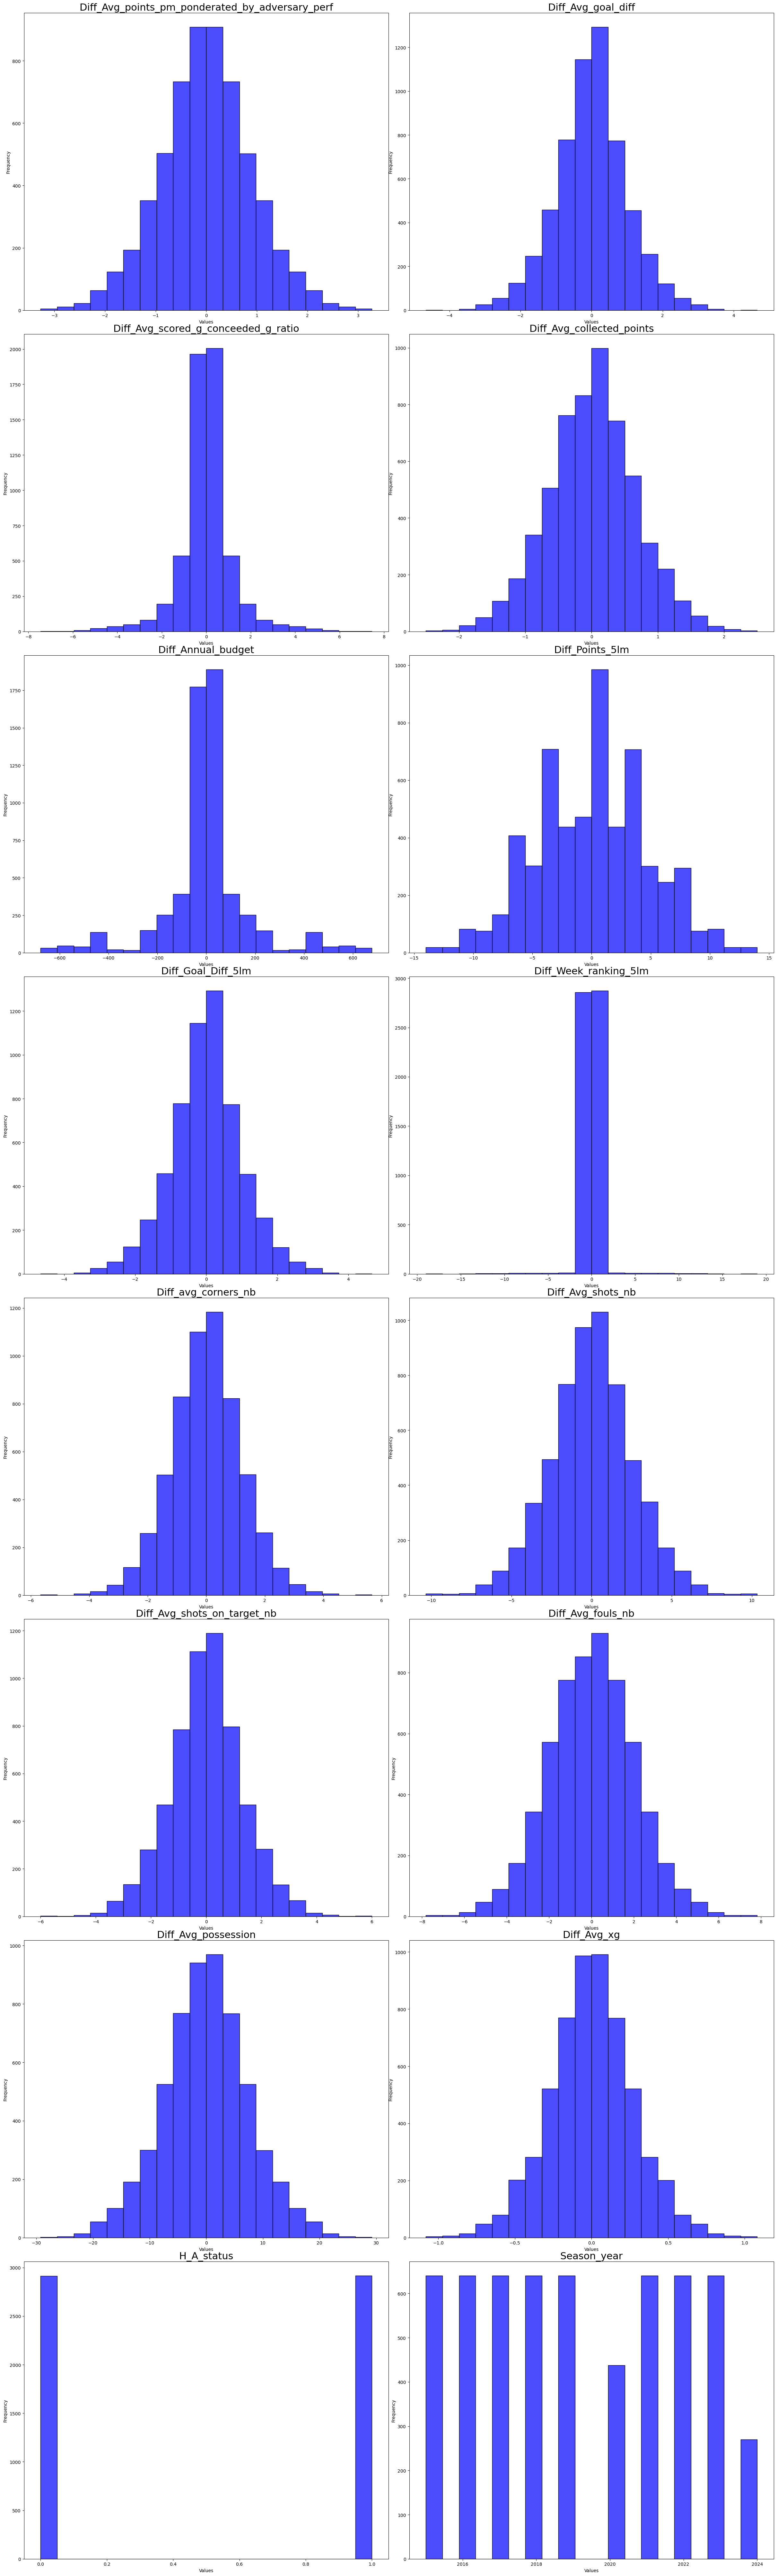

In [143]:
# Import the full dataset
X   = make_dataset.load_data(False, 'processed/not_split/X')
Y   = make_dataset.load_data(False, 'processed/not_split/Y')
X_info = make_dataset.load_data(False, 'processed/not_split/X_info')


# Short data insight
visualize.plot_all_num_features(X, save = False, density_estimate = False)

<span style="color:#228B22;"> <em> <font size="3"> Remark:
- All feature names start with ‘Diff_’ because they represent the difference of a given statistic between the two opposing teams.

- The features displayed above are the ones retained from a larger set of more than 150, after feature selection.


 <strong> <font size="4"> 2) Splitting the dataset by championship seasons

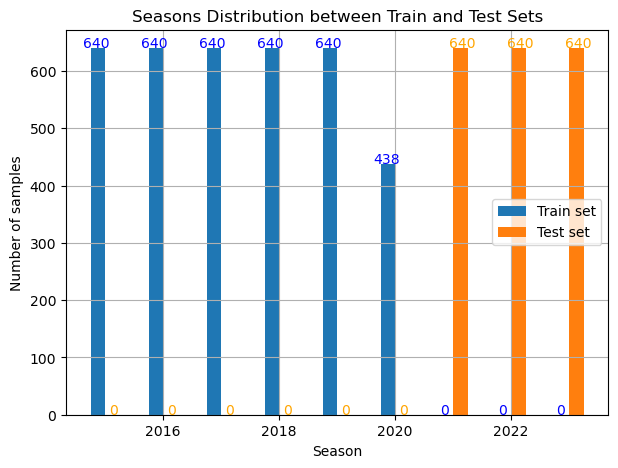

In [ ]:
#Load the train and test datasets:
X_train_00   = make_dataset.load_data(False, 'processed/split/X_train_00')
Y_train_00   = make_dataset.load_data(False, 'processed/split/Y_train_00')
X_test_00   = make_dataset.load_data(False, 'processed/split/X_test_00')
Y_test_00   = make_dataset.load_data(False, 'processed/split/Y_test_00')

# Display the distribution of train and test sets by season
preprocessing.hist_seasons(X_train_00.copy(), X_test_00.copy())

<span style="color:#228B22;"> <font size="4"> Remark:</font> </span> The shorter bar for 2020 represents the COVID season, which was interrupted before the season ended. We decided not to shuffle samples because, in a realistic scenario, we train our model before the season starts. Below, we show a more sophisticated strategy of training based on an annual schedule.

<strong> <font size="5"> II) Model definition </font> </strong> </span>

In [145]:

### Choose the Scaler

# Possible options:
# RobustScaler
# StandardScaler
# MinMaxScaler

Scaler = "StandardScaler"   # TODO


###  Choose how many features the selector (SelectKBest) will select among the 16 available.

# Must be in [1,16]

nb_of_feat_to_select = 15   # TODO


### Chose Logistic Rgression regularization penalty

# l1
# l2
# elasticnet
# None

penalty = 'l2'   # TODO


### Chose regularization factor
# C is the inverse of regularization strength (a smaller value corresponds to stronger regularization).

# Must be a positive number (> 0)

C = 10    # TODO


# Create the pipeline
personalised_pipeline = user_test.create_pipeline(nb_of_feat_to_select, Scaler, penalty, C)

# Model training
personalised_pipeline.fit(X_train_00.copy(), Y_train_00.copy().values.ravel())


# Just to see an example of an optimal parameter combination
# This is the best pipeline developed previously by myself
best_pipeline = model.load_pipeline("chosen_pipeline")
print(best_pipeline)

Successfully loaded the pipeline: chosen_pipeline


Pipeline(steps=[('scaler', StandardScaler()),
                ('features_selector', SelectKBest(k=13)),
                ('model',
                 LogisticRegression(C=0.025118864315095808, max_iter=3000,
                                    multi_class='auto', random_state=999,
                                    solver='newton-cg', verbose=False))])


c:\Users\polol\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\polol\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SelectKBest from version 1.3.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\polol\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.2 when using version 1.5.1. This might lead to breakin

 <strong> <font size="5"> III) Model evaluation

<strong> <font size="4"> 1) Predictions on the test set

In [ ]:
# Generate 'normal' probability  predictions 
normal_proba_pred = personalised_pipeline.predict_proba(X_test_00)[:,1]

# Generate probability predictions by re-training the pipeline every Season
proba_pred_GW_training, Y_test_GW_training, X_info_GW_training = results.proba_prediction_retrained_each_seas(X, Y, X_info, clone(personalised_pipeline), 'season', test_seasons =[2021,2022,2023])


c:\Users\polol\OneDrive\Documents\ML\Projet Mbappe (11.23- )\Projet Mbappe Cookiestructure\notebooks\../src\pipeline\results.py:496: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  X_info_pred = pd.concat([X_info_pred, X_test_info_for_this_seas], ignore_index=True, axis=0)


<span style="color:#228B22;"> <font size="4"> Remark:</font> </span> We first perform a classic prediction based on the previously trained pipeline. Below we perform the "sophisticated" method train-test split. We retrain the pipeline at every season before performing prediction for the coming season. The choice of an annual retrraining and not a weekly has been made after tests which shows that this was the best option.

<strong> <font size="4"> 2) log-loss score computation

In [ ]:

# Log-loss for the normally trained pipeline
user_test.pipe_log_loss(Y_test_00, normal_proba_pred, GW_training=False)

# Log-loss for the annually retrained pipeline
user_test.pipe_log_loss(Y_test_00, proba_pred_GW_training.values.ravel(), GW_training=True)

# Log-loss for the best pipeline built
user_test.best_pipe_log_loss()

Your personnalised pipeline log-loss is:                   0.6129401634209446
Your personnalised pipeline log-loss, annualy trained, is: 0.6025199296354605
The best pipeline log-loss is:                             0.5971624853556956


<strong> <font size="4"> 3) Plot model performances

Successfully loaded the datasets: pipeline_pred_proba_and_Y_and_X_info


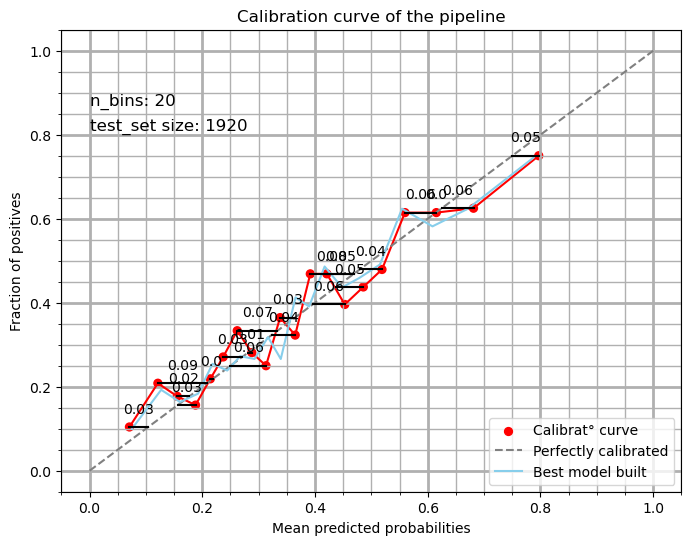

Above learning curve statistics on bins:

╒════╤════════════════╤═════════════════════════════╕
│    │ Bin interval   │   Predictions nb in the bin │
╞════╪════════════════╪═════════════════════════════╡
│  0 │ [0.02, 0.1]    │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  1 │ [0.1, 0.14]    │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  2 │ [0.14, 0.17]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  3 │ [0.17, 0.2]    │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  4 │ [0.2, 0.23]    │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  5 │ [0.23, 0.25]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  6 │ [0.25, 0.27]   │                          96 │
├────┼────────────────┼─────────────────────────────┤
│  7 │ [0.27, 0.3]    │                 

In [148]:
# We choose wether we plot the graphs on annual training simulations or on 'normal' training simulations

plot_with_annual_training = True   # TODO

user_test.plot_pipeline_pred_results(proba_pred_GW_training, Y_test_GW_training, X_info_GW_training, normal_proba_pred, Y_test_00, X_test_00, plot_with_annual_training, best_model_plot=True)

<span style="color:#228B22;"> <font size="4"> Remark:</font> </span>
The first table above contains the number of samples per bin and the probabilities interval of each bin. The second table contains, for each bin, the difference between the average of true probabilities in the bin and the average of predicted probability of the bin.

Considering the better results with the annual training method we abandon tests on 'normal' training and continue only with the annually retrained pipeline predictions

<strong> <font size="5"> IV) Comparaison of predicted probabilities and bookmakers probabilities

In [152]:
# Compare personalised pipeline predicted proba and bookmakers proba 
odd_proba_pred_proba_compa_dataset, preview_odd_proba_pred_proba_compa_dataset, odd_proba_pred_proba_compa_dataset_df = results.compare_pred_proba_and_odds(proba_pred_GW_training.copy() ,X_info_GW_training.copy())

# Display a preview of comparaison table between proba predicted and bookmakers proba
display(preview_odd_proba_pred_proba_compa_dataset)    # TODO

# Uncomment if you want to display the full comparaison table between proba predicted and bookmakers proba
# display(odd_proba_pred_proba_compa_dataset)    # TODO

# Table presenting statistics of deviation between proba predicted and bookmakers proba
results.compare_pred_proba_and_odds_stats(odd_proba_pred_proba_compa_dataset_df)

# Table presenting the statistics of deviation between BEST pipeline proba predicted and bookmakers proba
user_test.compare_best_pred_proba_and_odds_stats()

,Team_we_pred_vict_proba,Adversary,Game Week,Date,Played_matchs_nb,Max_victory_odd,Avg_victory_odd,Proba pred,Diff proba_pred avg_odd proba,Diff proba_pred Max_odd proba
0,Dijon,Rennes,7,2020-10-16 17:00:00,6,5.280000,5.020000,10.1%,-9.8%,-8.8%
1,Nîmes,PSG,7,2020-10-16 19:00:00,6,8.300000,7.190000,11.7%,-2.2%,-0.3%
2,Reims,Lorient,7,2020-10-17 15:00:00,6,2.200000,2.110000,36.9%,-10.5%,-8.5%
3,Marseille,Bordeaux,7,2020-10-17 19:00:00,6,2.130000,2.030000,48.8%,-0.5%,1.8%
4,Strasbourg,Lyon,7,2020-10-18 11:00:00,6,3.700000,3.460000,9.4%,-19.5%,-17.7%
5,Angers,Metz,7,2020-10-18 13:00:00,6,2.180000,2.040000,36.5%,-12.5%,-9.3%
6,Monaco,Montpellier,7,2020-10-18 13:00:00,6,1.540000,1.500000,55.0%,-11.7%,-10.0%
7,Nantes,Brest,7,2020-10-18 13:00:00,6,2.220000,2.140000,36.6%,-10.2%,-8.5%
8,St Etienne,Nice,7,2020-10-18 15:00:00,6,2.430000,2.340000,35.6%,-7.2%,-5.6%
9,Lille,Lens,7,2020-10-18 19:00:00,6,1.970000,1.870000,40.3%,-13.2%,-10.5%


,Mean Absolute Difference (%),25th Percentile (%),Median (%),75th Percentile (%)
Diff proba_pred avg_odd proba,5.1,1.8,4.0,7.0


,Mean Absolute Difference (%),25th Percentile (%),Median (%),75th Percentile (%)
Diff proba_pred avg_odd proba,4.8,1.7,3.8,6.7


<span style="color:#228B22;"> <font size="4"> Remark:</font> </span> We have to be careful with bookmakers probabilities, they are not computed to represent the exact accurate probability of winng but also depends on the betters behaviours, which introduces a bias.

<strong> <font size="5"> V) Trying to beat the bookmakers

In [150]:

# Define your strategy parameters to try to beat the bookmakers with the model you built:

# 1. Probability interval: The range of predicted probabilities to consider for betting. Low and high probabilities predictions are more prone to be biased as our model is less beformant on these interval
proba_interval_0 = [0.05, 0.6] # TODO

# 2. Minimum difference with odds probability: Minimum difference between predicted probability and the implied probability of odds
min_diff_with_odd_proba_0 = 0.05  # TODO

# 3. Game week interval: The range of game weeks to consider for betting (minimum 5). Before a certain number of matches we have less inoformation on teams statistics so our model is not performing well
GW_interval_0 = [6, 37]  # TODO

# 4. Bet amount: The amount of money to bet on each match
bet_0 = 10  # TODO

# Run the betting simulation with the chosen parameters
results_dataset = results.betting_simulation(
    compa_dataset=odd_proba_pred_proba_compa_dataset_df,
    Y_0=Y_test_GW_training,
    proba_interval_0=proba_interval_0,
    min_diff_with_odd_proba_0=min_diff_with_odd_proba_0,
    GW_interval_0=GW_interval_0,
    bet_0=bet_0
)

# Display the results
display(results_dataset)

Congratulation, you beat the bookmakers!
The final gain is 216.7 € , betting on 238 matches, out of 1920
This is equivalent to a net gain-to-bet ratio = 9.11 %


,Team_we_pred_vict_proba,Adversary,Game Week,Date,Played_matchs_nb,Max_victory_odd,Avg_victory_odd,Proba pred,Diff proba_pred avg_odd proba,Diff proba_pred Max_odd proba,Result,Gain
14,Brest,Strasbourg,8,2020-10-25 14:00:00,7,2.31,2.23,0.534885,0.086455,0.101985,0,-10.0
15,Metz,St Etienne,8,2020-10-25 14:00:00,7,2.48,2.38,0.493086,0.072918,0.089860,1,14.8
17,Nice,Lille,8,2020-10-25 16:00:00,7,3.54,3.33,0.501865,0.201565,0.219379,0,-10.0
29,Bordeaux,Montpellier,10,2020-11-07 16:00:00,9,2.50,2.36,0.461765,0.038036,0.061765,0,-10.0
32,Lens,Reims,10,2020-11-08 14:00:00,7,2.22,2.14,0.530275,0.062985,0.079825,0,-10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1860,Lyon,Strasbourg,33,2023-04-28 19:00:00,32,2.71,2.62,0.519973,0.138294,0.150970,1,17.1
1875,Clermont,Auxerre,34,2023-05-07 13:00:00,33,3.19,3.08,0.368550,0.043875,0.055071,0,-10.0
1881,Nice,Strasbourg,35,2023-05-13 15:00:00,34,3.20,3.03,0.404470,0.074437,0.091970,0,-10.0
1912,Toulouse,Monaco,38,2023-06-03 19:00:00,37,6.50,6.09,0.222614,0.058411,0.068768,1,55.0


<span style="color:#228B22;"> <font size="4"> Remark:</font> </span> Above we displayed the table with the matches we bet to have an higher odd than the bookmaker.